In [2]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(-5.5, 0.25, '신뢰구간 모평균에 대한 90% : \n$\\left( \\overline{x}-\\overline{y}\\right)$-1.645$\\sqrt{\\dfrac{\\sigma_{1}^{2}}{n}+\\dfrac{\\sigma_{2} ^{2}}{m}}$ , $\\left( \\overline{x}-\\overline{y}\\right)$+ 1.645$\\sqrt{\\dfrac{\\sigma_{1}^{2}}{n}+\\dfrac{\\sigma_{2} ^{2}}{m}}$')

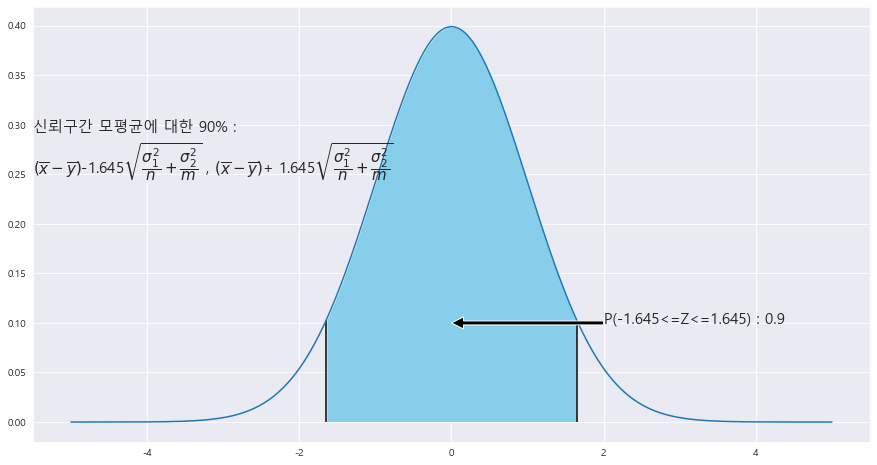

In [3]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 90#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)
#\left( \overline{x}-\overline{y}\right) -\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}
# ex = '93.242 89.635 92.660 92.540 94.883 102.165 93.326 90.880 93.684 91.564 88.727 94.317 88.166 96.085 82.028 97.213 99.338 93.381 86.498 83.348 97.262 89.656 84.045 89.113 81.562 87.180 94.345 92.436 93.633 97.276'
# A = list(map(float, ex.split(' ')))
# print(A)
# MEANS = round(np.mean(A) ,3)

# VARS = 5.105**2
# STDS = round(math.sqrt(VARS/len(A)),3)
# # print((z_1 * STDS / math.sqrt(len(A))))
# ax.text(2 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + f'{round(MEANS - (z_1 * STDS ),3)} ~ {round(MEANS + (z_1 * STDS ),3)}' , fontsize= 15)
#
#
# ax.text(2 , .35,  r'$\overline{X} = $' + f'{MEANS}\n' +  r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(len(A)),2)}',fontsize=15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(-5.5, 0.25, '신뢰구간 모평균에 대한 95% : \n$\\left( \\overline{x}-\\overline{y}\\right)$-1.96$\\sqrt{\\dfrac{\\sigma_{1}^{2}}{n}+\\dfrac{\\sigma_{2} ^{2}}{m}}$ , $\\left( \\overline{x}-\\overline{y}\\right)$+ 1.96$\\sqrt{\\dfrac{\\sigma_{1}^{2}}{n}+\\dfrac{\\sigma_{2} ^{2}}{m}}$')

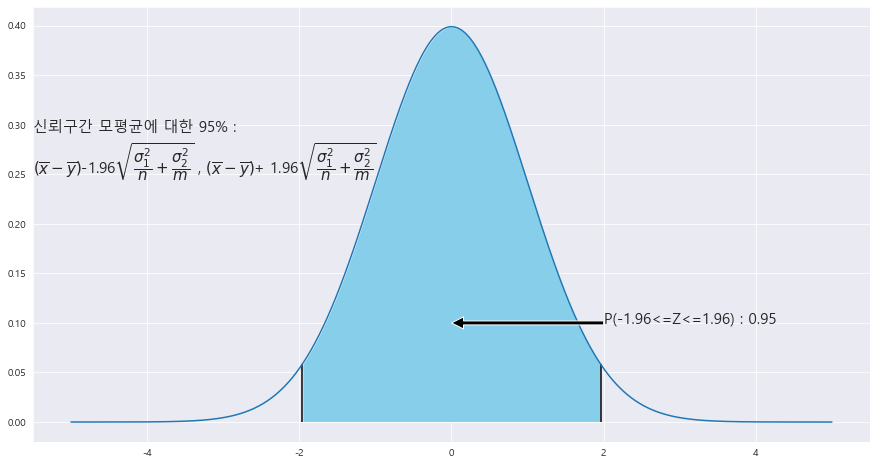

In [4]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(-5.5, 0.25, '신뢰구간 모평균에 대한 99% : \n$\\left( \\overline{x}-\\overline{y}\\right)$-2.576$\\sqrt{\\dfrac{\\sigma_{1}^{2}}{n}+\\dfrac{\\sigma_{2} ^{2}}{m}}$ , $\\left( \\overline{x}-\\overline{y}\\right)$+ 2.576$\\sqrt{\\dfrac{\\sigma_{1}^{2}}{n}+\\dfrac{\\sigma_{2} ^{2}}{m}}$')

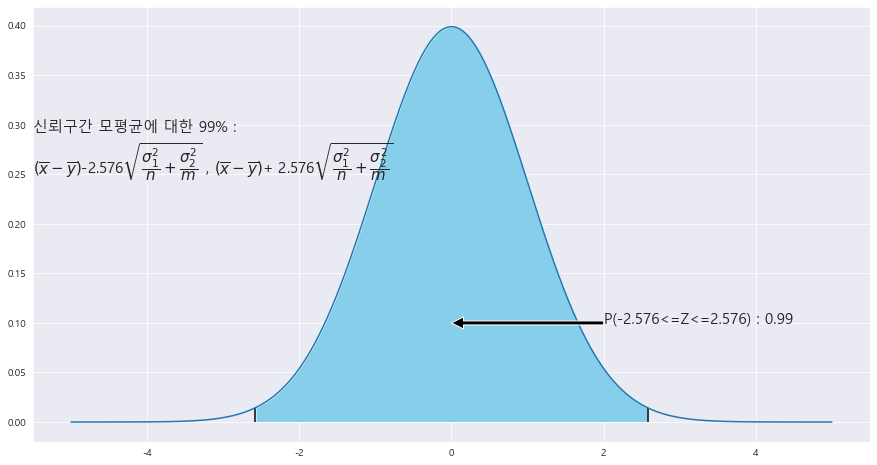

In [5]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 99#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

In [6]:
A = '1.69 1.79 1.68 1.72 1.66 1.73 1.59 1.78 1.72 1.63 1.55 1.85'

B = '1.46 1.47 1.42 1.51 1.55 1.52 1.48 1.47 1.53 1.50'

A = list(map(float , A.split(' ')))

B = list(map(float , B.split(' ')))

print(A)
print(B)

MEANS_A = np.mean(A)
MEANS_B = np.mean(B)

print(MEANS_A)
print(MEANS_B)





[1.69, 1.79, 1.68, 1.72, 1.66, 1.73, 1.59, 1.78, 1.72, 1.63, 1.55, 1.85]
[1.46, 1.47, 1.42, 1.51, 1.55, 1.52, 1.48, 1.47, 1.53, 1.5]
1.699166666666667
1.4909999999999999


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(2, 0.25, '모평균의 차에 대한 신뢰구간 95% : \n0.159 ~ 0.257')

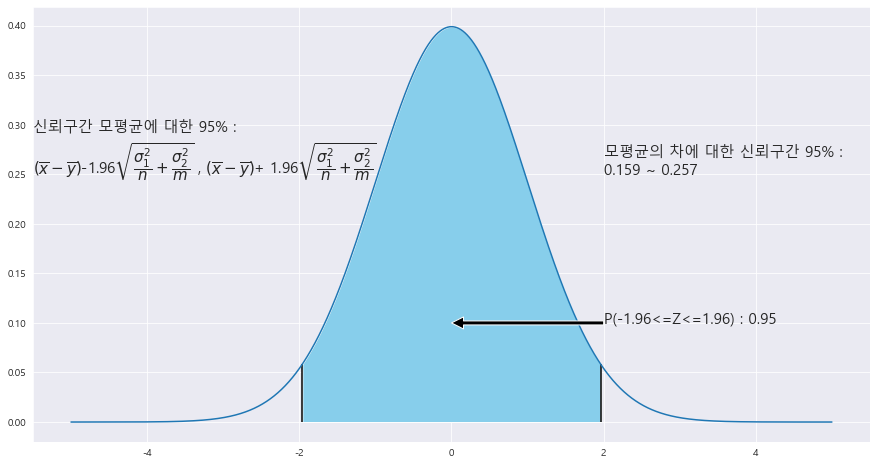

In [7]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

A = '1.69 1.79 1.68 1.72 1.66 1.73 1.59 1.78 1.72 1.63 1.55 1.85'
B = '1.46 1.47 1.42 1.51 1.55 1.52 1.48 1.47 1.53 1.50'
A = list(map(float , A.split(' ')))
B = list(map(float , B.split(' ')))
MEANS_A = np.mean(A)
MEANS_B = np.mean(B)
Var_A = 0.08**2
Var_B = 0.03**2


ax.text(2 , .25, f'모평균의 차에 대한 신뢰구간 {trust}% : \n' + f'{round((MEANS_A-MEANS_B) - (z_1)*math.sqrt(Var_A/len(A) + Var_B/len(B)),3)} ~ {round((MEANS_A-MEANS_B) + (z_1)*math.sqrt(Var_A/len(A) + Var_B/len(B)),3)}' , fontsize= 15)
#
#
# ax.text(2 , .35,  r'$\sqrt{\widehat{p}\widehat{q}} = $' + f'{round(math.sqrt(RATIO * (1-RATIO)),3)}\n'  + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),2)}',fontsize=15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(2, 0.25, '모평균의 차에 대한 신뢰구간 90% : \n0.152 ~ 0.265')

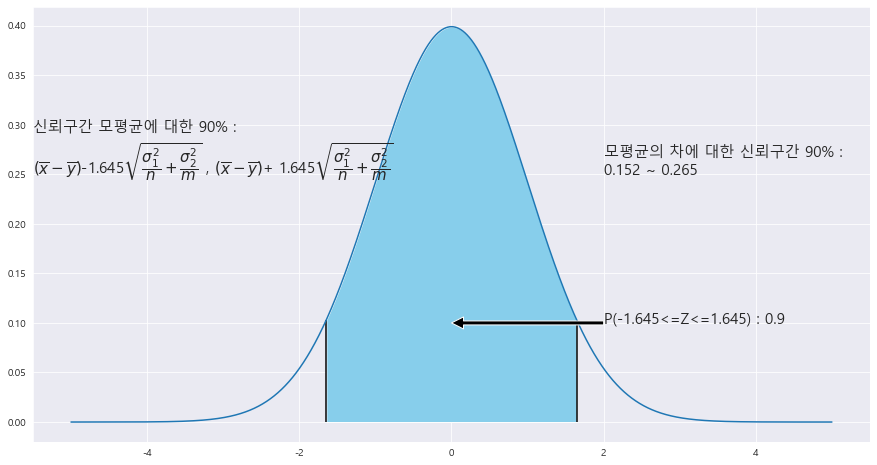

In [8]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 90#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

A = '1.69 1.79 1.68 1.72 1.66 1.73 1.59 1.78 1.72 1.63 1.55 1.85'
B = '1.46 1.47 1.42 1.51 1.55 1.52 1.48 1.47 1.53 1.50'
A = list(map(float , A.split(' ')))
B = list(map(float , B.split(' ')))
MEANS_A = np.mean(A)
MEANS_B = np.mean(B)
Var_A = 0.08**2
Var_B = 0.08**2


ax.text(2 , .25, f'모평균의 차에 대한 신뢰구간 {trust}% : \n' + f'{round((MEANS_A-MEANS_B) - (z_1)*math.sqrt(Var_A/len(A) + Var_B/len(B)),3)} ~ {round((MEANS_A-MEANS_B) + (z_1)*math.sqrt(Var_A/len(A) + Var_B/len(B)),3)}' , fontsize= 15)


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(-5.5, 0.25, '신뢰구간 모평균에 대한 90% : \n$\\left(\\widehat{p}_{1} - \\widehat{p}_{2}\\right)$-1.645$\\sqrt{\\dfrac{\\widehat{p}_{1}\\widehat{q}_{1}}{n}+\\dfrac{\\widehat{p}_{2}\\widehat{q}_{2}}{m}}$ , $\\left(\\widehat{p}_{1} - \\widehat{p}_{2}\\right)$+ 1.645$\\sqrt{\\dfrac{\\widehat{p}_{1}\\widehat{q}_{1}}{n}+\\dfrac{\\widehat{p}_{2}\\widehat{q}_{2}}{m}}$')

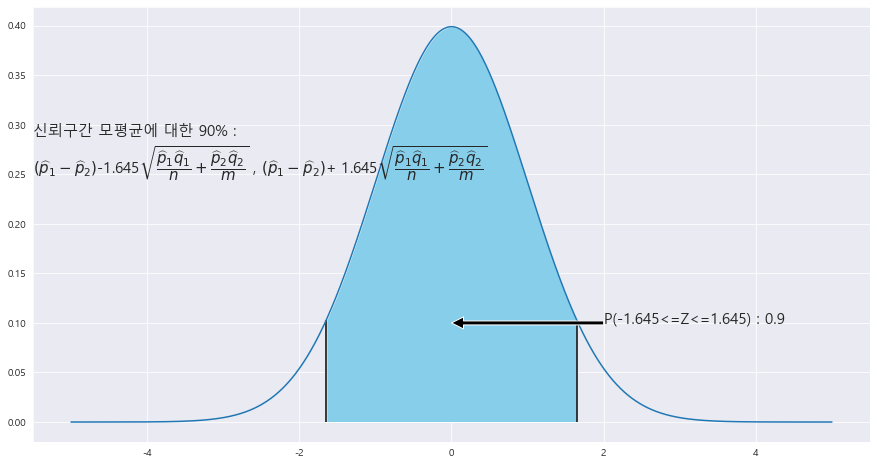

In [9]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 90#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left(\widehat{p}_{1} - \widehat{p}_{2}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$' +' , '+ r'$\left(\widehat{p}_{1} - \widehat{p}_{2}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$',fontsize=15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(-5.5, 0.25, '신뢰구간 모평균에 대한 95% : \n$\\left(\\widehat{p}_{1} - \\widehat{p}_{2}\\right)$-1.96$\\sqrt{\\dfrac{\\widehat{p}_{1}\\widehat{q}_{1}}{n}+\\dfrac{\\widehat{p}_{2}\\widehat{q}_{2}}{m}}$ , $\\left(\\widehat{p}_{1} - \\widehat{p}_{2}\\right)$+ 1.96$\\sqrt{\\dfrac{\\widehat{p}_{1}\\widehat{q}_{1}}{n}+\\dfrac{\\widehat{p}_{2}\\widehat{q}_{2}}{m}}$')

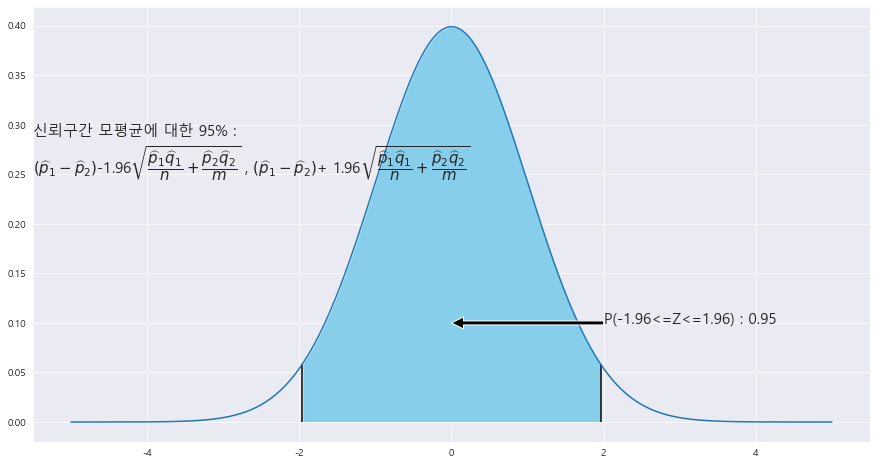

In [10]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left(\widehat{p}_{1} - \widehat{p}_{2}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$' +' , '+ r'$\left(\widehat{p}_{1} - \widehat{p}_{2}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$',fontsize=15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(-5.5, 0.25, '신뢰구간 모평균에 대한 99% : \n$\\left(\\widehat{p}_{1} - \\widehat{p}_{2}\\right)$-2.576$\\sqrt{\\dfrac{\\widehat{p}_{1}\\widehat{q}_{1}}{n}+\\dfrac{\\widehat{p}_{2}\\widehat{q}_{2}}{m}}$ , $\\left(\\widehat{p}_{1} - \\widehat{p}_{2}\\right)$+ 2.576$\\sqrt{\\dfrac{\\widehat{p}_{1}\\widehat{q}_{1}}{n}+\\dfrac{\\widehat{p}_{2}\\widehat{q}_{2}}{m}}$')

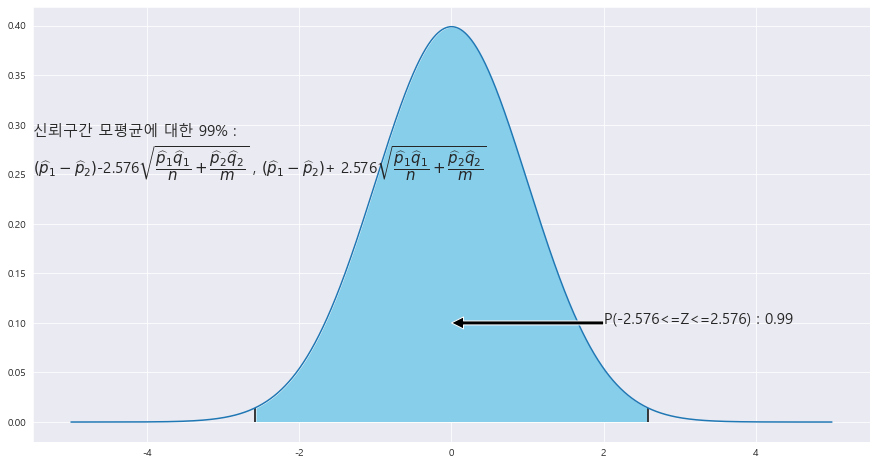

In [11]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 99#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left(\widehat{p}_{1} - \widehat{p}_{2}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$' +' , '+ r'$\left(\widehat{p}_{1} - \widehat{p}_{2}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$',fontsize=15)

In [12]:
p1 = 254/470
p2 = 223/619
print(p1)
print(p2)
print(p1-p2)

print(math.sqrt(p1*(1-p1) / 470 + p2*(1-p2)/619))

0.5404255319148936
0.3602584814216478
0.18016705049324583
0.03001279532846492


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(1, 0.35, ' 신뢰구간 95% 에 대한 오차 한계( $e_{95}) : $ \n${1.960}\\sqrt{\\dfrac{\\widehat{p}_{1}\\widehat{q}_{1}}{n}+\\dfrac{\\widehat{p}_{2}\\widehat{q}_{2}}{m}}$ = 0.059 ')

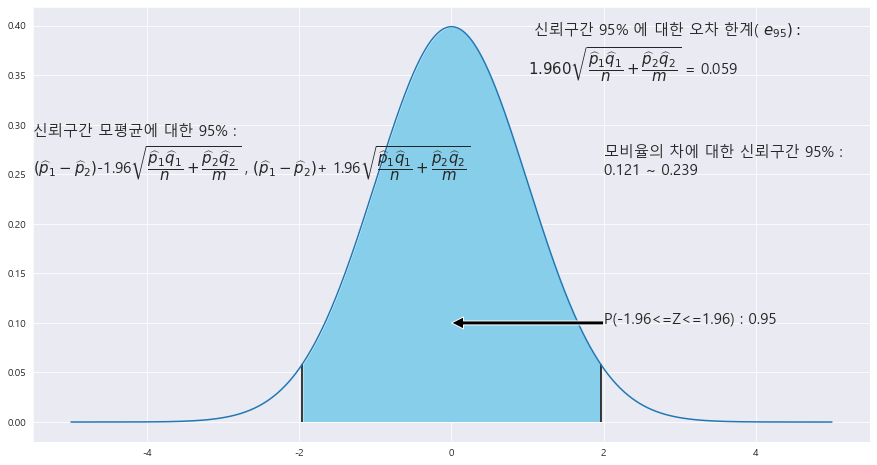

In [13]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left(\widehat{p}_{1} - \widehat{p}_{2}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$' +' , '+ r'$\left(\widehat{p}_{1} - \widehat{p}_{2}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$',fontsize=15)
p1 = 254/470
p2 = 223/619
A = 470
B = 619

ax.text(2 , .25, f'모비율의 차에 대한 신뢰구간 {trust}% : \n' + f'{round((p1-p2) - (z_1)*math.sqrt(p1*(1-p1)/A + p2*(1-p2)/B),3)} ~ {round((p1-p2) + (z_1)*math.sqrt(p1*(1-p1)/A + p2*(1-p2)/B),3)}' , fontsize= 15)

ax.text(1 , .35, f' 신뢰구간 {trust}% 에 대한 오차 한계( ' +r'$e_{%d}) : $ '% trust + f'\n' + r'${%.3f}\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$ = '% z_1 + f'{round((z_1)*math.sqrt(p1*(1-p1)/A + p2*(1-p2)/B),3)} ' , fontsize= 15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(1, 0.35, ' 신뢰구간 90% 에 대한 오차 한계( $e_{90}) : $ \n${1.645}\\sqrt{\\dfrac{\\widehat{p}_{1}\\widehat{q}_{1}}{n}+\\dfrac{\\widehat{p}_{2}\\widehat{q}_{2}}{m}}$ = 0.062 ')

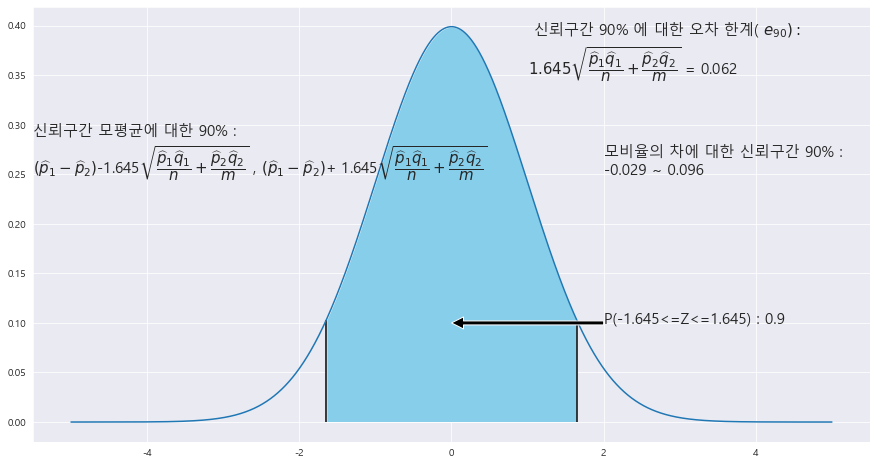

In [14]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 90#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left(\widehat{p}_{1} - \widehat{p}_{2}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$' +' , '+ r'$\left(\widehat{p}_{1} - \widehat{p}_{2}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$',fontsize=15)
p1 = 215/250
p2 = 124/150
A = 250
B = 150

ax.text(2 , .25, f'모비율의 차에 대한 신뢰구간 {trust}% : \n' + f'{round((p1-p2) - (z_1)*math.sqrt(p1*(1-p1)/A + p2*(1-p2)/B),3)} ~ {round((p1-p2) + (z_1)*math.sqrt(p1*(1-p1)/A + p2*(1-p2)/B),3)}' , fontsize= 15)

ax.text(1 , .35, f' 신뢰구간 {trust}% 에 대한 오차 한계( ' +r'$e_{%d}) : $ '% trust + f'\n' + r'${%.3f}\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$ = '% z_1 + f'{round((z_1)*math.sqrt(p1*(1-p1)/A + p2*(1-p2)/B),3)} ' , fontsize= 15)